In [1]:
import pandas as pd

users = pd.read_csv("resources/data/user_dataset.csv")

In [2]:
users.head(5)

,user_no,user_id,user_gender,user_age,buy_count,cheese_rank,cheese_code,cheese_id,cheese_brand,cheese_name,cheese_texture,cheese_types,cheese_category,cheese_one_price,gender,age_group,cheese_category_code,cheese_texture_code,brand,brand_code
0,0,2391853,M,40,1,8.0,8,p8,프란시아,리코타 치즈,후레쉬치즈,자연치즈,리코타,"4,600원",0,3,3,1,프란시아,15
1,1,1799897,F,40,1,8.0,8,p8,프란시아,리코타 치즈,후레쉬치즈,자연치즈,리코타,"4,600원",1,3,3,1,프란시아,15
2,2,1614947,F,50,1,10.0,10,p10,푸글리제,모짜렐라,후레쉬치즈,자연치즈,모짜렐라,"5,500원",1,4,1,1,푸글리제,30
3,3,1614947,F,50,1,10.0,10,p10,푸글리제,모짜렐라,후레쉬치즈,자연치즈,모짜렐라,"5,500원",1,4,1,1,푸글리제,30
4,4,1614947,F,50,5,14.0,15,p14,콜롬보,모짜렐라,후레쉬치즈,자연치즈,모짜렐라,"4,900원",1,4,1,1,콜롬보,28


In [3]:
# user_X_train_set = user_X_train.drop('user_id', axis = 1)
users['cheese_id'] = users['cheese_id'].str.replace('p','')
users['cheese_one_price'] = users['cheese_one_price'].str.replace(',', '')
users['cheese_one_price'] = users['cheese_one_price'].str.replace('원', '')
users = users.astype({'cheese_one_price': int})

# user_X_trian_set = user_X_train_set.astype({'cheese_one_price': int})

In [4]:
users.head(5)

,user_no,user_id,user_gender,user_age,buy_count,cheese_rank,cheese_code,cheese_id,cheese_brand,cheese_name,cheese_texture,cheese_types,cheese_category,cheese_one_price,gender,age_group,cheese_category_code,cheese_texture_code,brand,brand_code
0,0,2391853,M,40,1,8.0,8,8,프란시아,리코타 치즈,후레쉬치즈,자연치즈,리코타,4600,0,3,3,1,프란시아,15
1,1,1799897,F,40,1,8.0,8,8,프란시아,리코타 치즈,후레쉬치즈,자연치즈,리코타,4600,1,3,3,1,프란시아,15
2,2,1614947,F,50,1,10.0,10,10,푸글리제,모짜렐라,후레쉬치즈,자연치즈,모짜렐라,5500,1,4,1,1,푸글리제,30
3,3,1614947,F,50,1,10.0,10,10,푸글리제,모짜렐라,후레쉬치즈,자연치즈,모짜렐라,5500,1,4,1,1,푸글리제,30
4,4,1614947,F,50,5,14.0,15,14,콜롬보,모짜렐라,후레쉬치즈,자연치즈,모짜렐라,4900,1,4,1,1,콜롬보,28


## 데이터 이상치 확인

Text(0.5, 1.0, 'gender vs buy_count')

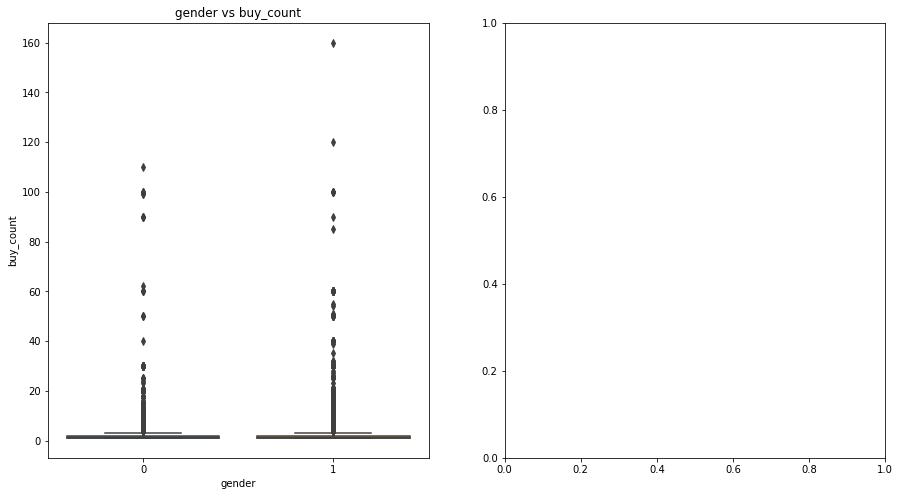

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

f, axes = plt.subplots(ncols = 2, figsize = (15, 8))

sns.boxplot(x="gender", y="buy_count", data = users, ax=axes[0])
axes[0].set_title("gender vs buy_count")



## train, test 데이터 셋 만들기

In [9]:
from sklearn.model_selection import train_test_split

X_user = users[['user_age', 'gender', 'buy_count', 'cheese_rank', 'age_group', 'cheese_texture_code', 'brand_code', 'cheese_one_price']]
y_user = users[['cheese_category_code']]

X_user_train, X_user_test, y_user_train, y_user_test = train_test_split(X_user, y_user, test_size = 0.3, random_state = 32)

In [10]:
X_user_train.head(5)

,user_age,gender,buy_count,cheese_rank,age_group,cheese_texture_code,brand_code,cheese_one_price
3312,30,1,2,2.0,2,1,15,3870
21971,30,1,2,2.0,2,1,15,3870
2347,50,1,1,15.0,4,1,28,6860
18459,40,0,3,2.0,3,1,15,3870
8768,40,1,1,17.0,3,1,15,6240


In [11]:
y_user_train.head(5)

,cheese_category_code
3312,1
21971,1
2347,3
18459,1
8768,1


## 히스토그램

<AxesSubplot:xlabel='brand_code'>

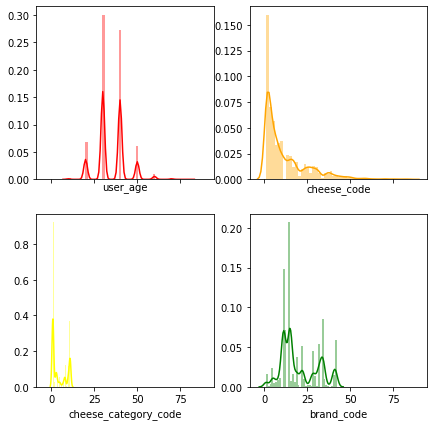

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(2, 2, figsize=(7,7), sharex=True)
sns.distplot(users["user_age"], color="red", ax=axes[0,0])
sns.distplot(users["cheese_code"], color="orange", ax=axes[0,1])
sns.distplot(users["cheese_category_code"], color = "yellow", ax=axes[1,0])
sns.distplot(users["brand_code"], color = "green", ax=axes[1,1])
# sns.distplot(user_data["cheese_texture_code"], color="blue", ax=axes[0,2])
# sns.distplot(user_data["cheese_one_price"], color = "purple", ax=axes[1,2])

<AxesSubplot:xlabel='cheese_one_price'>

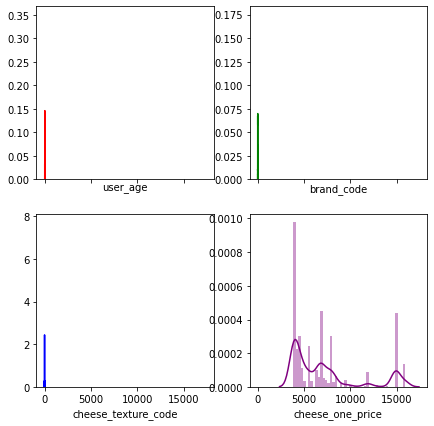

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(2, 2, figsize=(7,7), sharex=True)
sns.distplot(X_user_train["user_age"], color="red", ax=axes[0,0])
sns.distplot(X_user_train["brand_code"], color = "green", ax=axes[0,1])
sns.distplot(X_user_train["cheese_texture_code"], color="blue", ax=axes[1,0])
sns.distplot(X_user_train["cheese_one_price"], color = "purple", ax=axes[1,1])

## 데이터 변환

<AxesSubplot:xlabel='log_cheese_code'>

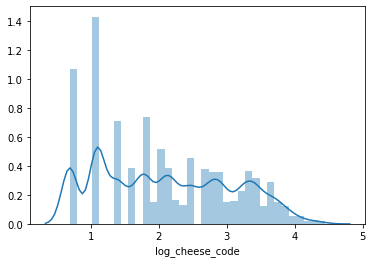

In [10]:
import numpy as np
import seaborn as sns

users['log_cheese_code'] = np.log1p(users['cheese_code'])

# f, ax = plt.subplots(1, 2, figsize = (10, 6),  sharex=True)

# sns.distplot(user_data['cheese_code'], ax=axes[0,0])
# sns.distplot(user_data['log_cheese_code'], ax=axes[0,1])

# sns.distplot(user_data['cheese_code'])
sns.distplot(users['log_cheese_code'])

## 변수 간 상관성 보기

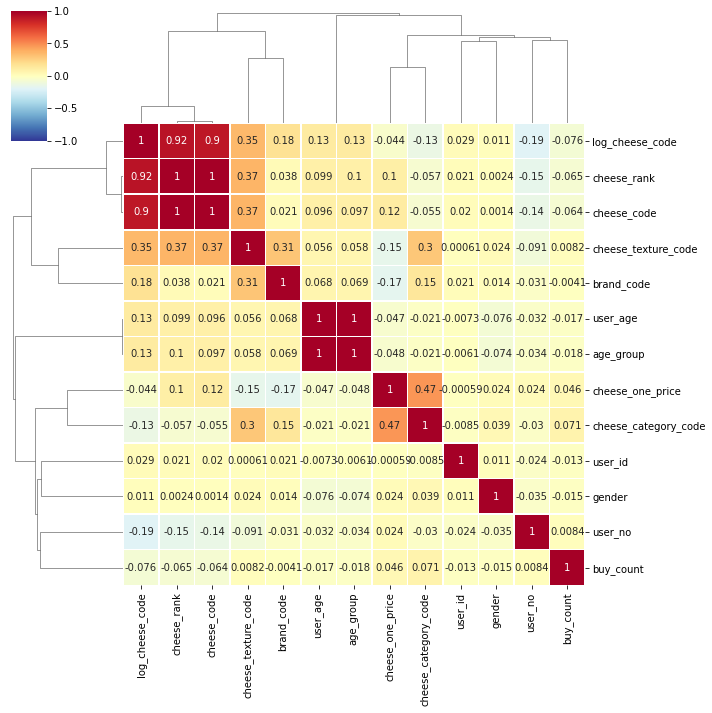

In [11]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

def make_corr(data):
    make_corr = data.corr()
    sns.clustermap(make_corr, annot = True, cmap = 'RdYlBu_r', linewidths=.5, cbar_kws={"shrink": .5}, vmin = -1, vmax = 1)
    plt.show()
    
    
make_corr(users)

## 정규화하기

In [12]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_user)
X_user = pd.DataFrame(x_scaled, columns = X_user.columns)

In [13]:
X_user.head(5)

,user_age,gender,buy_count,cheese_rank,age_group,cheese_texture_code,brand_code,cheese_one_price
0,0.428571,0.0,0.000000,0.102941,0.50,0.0,0.341463,0.060682
1,0.428571,1.0,0.000000,0.102941,0.50,0.0,0.341463,0.060682
2,0.571429,1.0,0.000000,0.132353,0.75,0.0,0.707317,0.135495
3,0.571429,1.0,0.000000,0.132353,0.75,0.0,0.707317,0.135495
4,0.571429,1.0,0.025157,0.191176,0.75,0.0,0.658537,0.085619


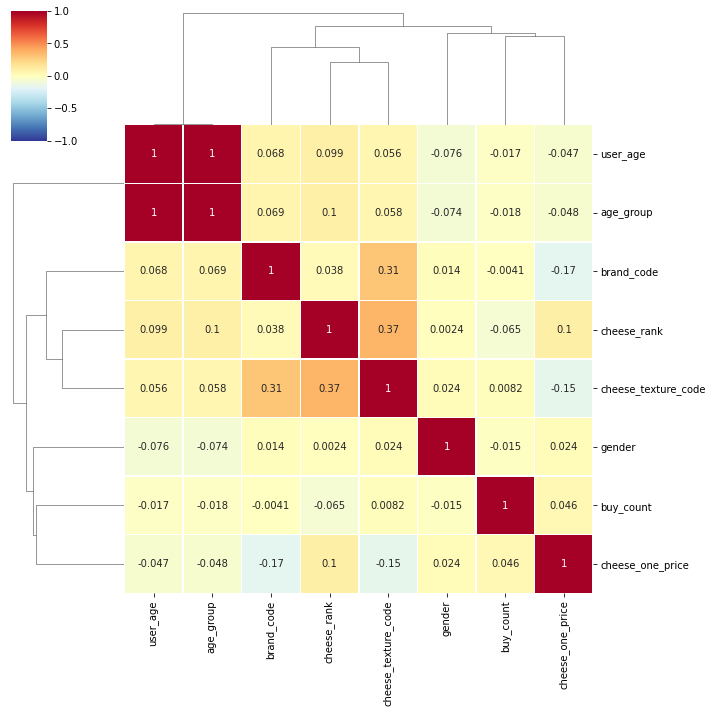

In [14]:
make_corr(X_user)

array([[<AxesSubplot:xlabel='cheese_category_code', ylabel='cheese_category_code'>,
        <AxesSubplot:xlabel='user_age', ylabel='cheese_category_code'>,
        <AxesSubplot:xlabel='gender', ylabel='cheese_category_code'>,
        <AxesSubplot:xlabel='buy_count', ylabel='cheese_category_code'>,
        <AxesSubplot:xlabel='cheese_rank', ylabel='cheese_category_code'>,
        <AxesSubplot:xlabel='age_group', ylabel='cheese_category_code'>,
        <AxesSubplot:xlabel='cheese_texture_code', ylabel='cheese_category_code'>,
        <AxesSubplot:xlabel='brand_code', ylabel='cheese_category_code'>,
        <AxesSubplot:xlabel='cheese_one_price', ylabel='cheese_category_code'>],
       [<AxesSubplot:xlabel='cheese_category_code', ylabel='user_age'>,
        <AxesSubplot:xlabel='user_age', ylabel='user_age'>,
        <AxesSubplot:xlabel='gender', ylabel='user_age'>,
        <AxesSubplot:xlabel='buy_count', ylabel='user_age'>,
        <AxesSubplot:xlabel='cheese_rank', ylabel='user_age'>,
 

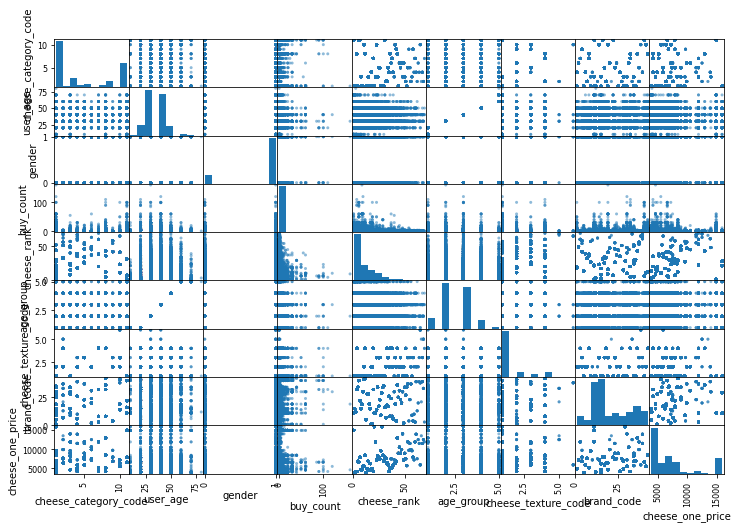

In [15]:
from pandas.plotting import scatter_matrix

attributes = ['cheese_category_code', 'user_age', 'gender', 'buy_count', 'cheese_rank', 'age_group', 'cheese_texture_code', 'brand_code', 'cheese_one_price']
scatter_matrix(users[attributes], figsize=(12, 8))


### 산점도로 카테고리 확인

In [16]:
# import matplotlib.pyplot as plt
# import numpy as np

# scatter = plt.scatter()

### 모델링 선택하기

In [17]:
# class UserModel:
#     def __init__(self):
#         self.odf = None
#     @staticmethod
#     def create_k_fold():
#         return KFold(n_splits = 10, shuffle = True, random_state = 0)

#     def accuracy_by_dtree():
#         dtree = DecisionTreeClassifier()
#         score = cross_val_score(dtree, X_user_train, y_user_train, cv =UserModel.create_k_fold(), \
#                 n_jobs = 1, scoring = 'accuracy')
#         return round(np.mean(score) * 100, 2)

#     def accuracy_by_rforest():
#         rforest = RandomForestClassifier()
#         score = cross_val_score(rforest, X_user_train, y_user_train, cv = UserModel.create_k_fold(), \
#                 n_jobs = 1, scoring = 'accuracy')
#         return round(np.mean(score) * 100, 2)

#     def accuracy_by_knn():
#         knn = KNeighborsClassifier()
#         score = cross_val_score(knn, X_user_train , y_user_train, cv = UserModel.create_k_fold(), \
#                 n_jobs = 1, scoring = 'accuracy')
#         return round(np.mean(score) * 100, 2)

#     def accuracy_by_svm():
#         svm = SVC()
#         score = cross_val_score(svm, X_user_train, y_user_train, cv = UserModel.create_k_fold(), \
#                 n_jobs = 1, scoring = 'accuracy')
#         return round(np.mean(score) * 100, 2)
    
    
#     def modeling():
#         this = self.new(train, test)
#         this.label = self.create_label(this)
#         this.train = self.create_train(this)
#         print(f'>> Train 변수 : {this.train.columns}')
#         print(f'>> Test 변수 : {this.train.columns}')
#         return this

#     def learning(self, train, test):
#         service = self.service
#         this = self.modeling(train,test)
#         print(f'Dtree verification result: {service.accuracy_by_dtree(this)}')
#         print(f'RForest verification result: {service.accuracy_by_rforest(this)}')
#         print(f'Naive Bayes tree verification result: {service.accuracy_by_nb(this)}')
#         print(f'KNN verification result: {service.accuracy_by_knn(this)}')
#         print(f'SVM verification result: {service.accuracy_by_svm(this)}')

### 샘플링

In [18]:
X_user_train_sample = X_user_train.sample(n = 1000, random_state = None)
X_user_test_sample = X_user_test.sample(n = 1000, random_state = None)
y_user_train_sample = y_user_train.sample(n = 1000, random_state = None)
y_user_test_sample = y_user_test.sample(n = 1000, random_state = None)

In [19]:
X_user_train.head(3)

,user_age,gender,buy_count,cheese_rank,age_group,cheese_texture_code,brand_code,cheese_one_price
3312,30,1,2,2.0,2,1,15,3870
21971,30,1,2,2.0,2,1,15,3870
2347,50,1,1,15.0,4,1,28,6860


### 표준화 (standardScaler)

In [12]:
# std 바꿔서 fitting

import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler

# 표준화
std = StandardScaler()
# std.fit(X_train)

X_user_train_std = std.fit_transform(X_user_train)
X_user_test_std = std.transform(X_user_test)
print(X_user_train_std)


[[-0.58733941  0.42761125 -0.01216164 ... -0.48303349 -0.48402246
  -0.85734486]
 [-0.58733941  0.42761125 -0.01216164 ... -0.48303349 -0.48402246
  -0.85734486]
 [ 1.74261025  0.42761125 -0.26129191 ... -0.48303349  0.73833953
  -0.07477204]
 ...
 [-0.58733941  0.42761125  0.23696863 ...  0.57380955  1.96070152
  -0.43072489]
 [-0.58733941  0.42761125 -0.26129191 ... -0.48303349 -1.04818953
   0.64236827]
 [ 1.74261025  0.42761125 -0.26129191 ...  0.57380955  1.96070152
  -0.43072489]]


In [21]:
# # std 바꿔서 fitting

# import sklearn.svm as svm
# import sklearn.metrics as mt
# from sklearn.model_selection import cross_val_score, cross_validate
# from sklearn.preprocessing import StandardScaler

# # 표준화
# std = StandardScaler()
# # std.fit(X_train)

# X_user_train_sample_std = std.fit_transform(X_user_train_sample)
# X_user_test_sample_std = std.transform(X_user_test_sample)
# print(X_user_train_sample_std)


### 정규화 

In [13]:
from sklearn.preprocessing import MinMaxScaler

ns = MinMaxScaler()
ns.fit(X_user_train)

X_user_train_ns = ns.transform(X_user_train)
X_user_test_ns = ns.transform(X_user_test)
print(X_user_train_ns)

[[0.33333333 1.         0.00840336 ... 0.         0.34146341 0.        ]
 [0.33333333 1.         0.00840336 ... 0.         0.34146341 0.        ]
 [0.66666667 1.         0.         ... 0.         0.65853659 0.2485453 ]
 ...
 [0.33333333 1.         0.01680672 ... 0.2        0.97560976 0.1354946 ]
 [0.33333333 1.         0.         ... 0.         0.19512195 0.47630923]
 [0.66666667 1.         0.         ... 0.2        0.97560976 0.1354946 ]]


In [23]:
# from sklearn.preprocessing import MinMaxScaler

# ns = MinMaxScaler()
# ns.fit(X_user_train_sample)

# X_user_train_sample_ns = ns.transform(X_user_train_sample)
# X_user_test_sample_ns = ns.transform(X_user_test_sample)
# print(X_user_train_sample_ns)

### 정규화한 X, y 데이터 상관관계

In [24]:
Xy_user = users[['cheese_category_code','user_age', 'gender', 'buy_count', 'cheese_rank', 'cheese_texture_code', 'brand_code', 'cheese_one_price']]

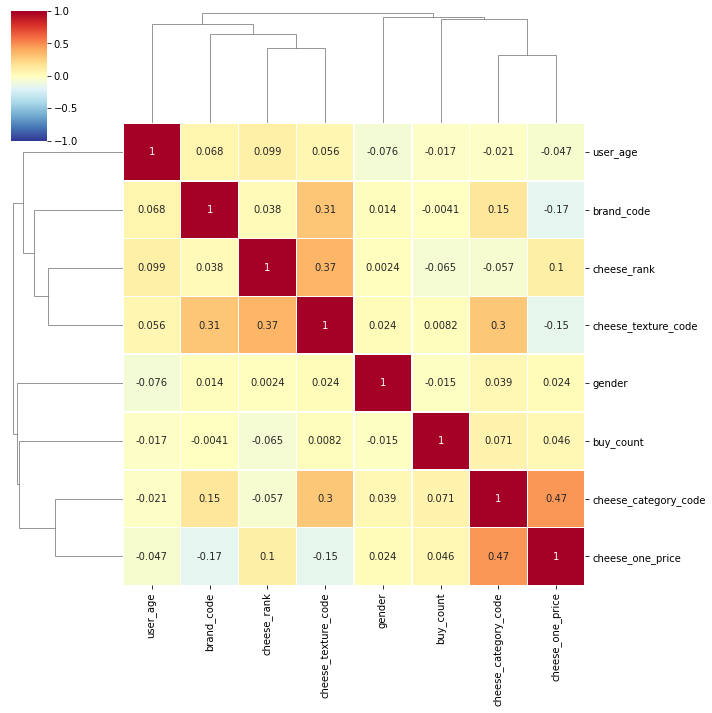

In [25]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

def make_corr(data):
    make_corr = data.corr()
    sns.clustermap(make_corr, annot = True, cmap = 'RdYlBu_r', linewidths=.5, cbar_kws={"shrink": .5}, vmin = -1, vmax = 1)
    plt.show()
    
    
make_corr(Xy_user)

### Random Forest

In [26]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import metrics

# forest = RandomForestClassifier(n_estimators=100)
# forest.fit(X_user_train, y_user_train)

# # 예측
# y_pred = forest.predict(X_user_test)
# print(y_pred)
# # print(list(y_test))

# print('정확도 : ', metrics.accuracy_score(y_user_test, y_pred))

# print("특성 중요도: \n{}".format(forest.feature_importances_))

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_user_train_sample, y_user_train_sample)

# 예측
y_pred = forest.predict(X_user_test_sample)
# print(y_pred)
# print(list(y_test))

print('정확도 : ', metrics.accuracy_score(y_user_test_sample, y_pred))

print("특성 중요도: \n{}".format(forest.feature_importances_))

정확도 :  0.407
특성 중요도: 
[0.09000582 0.09226118 0.25630526 0.16656252 0.08306479 0.04172522
 0.13722167 0.13285354]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [28]:
# 표준화
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_user_train_std, y_user_train)

# 예측
y_pred = forest.predict(X_user_test_std)
# print(y_pred)
# print(list(y_test))

print('정확도 : ', metrics.accuracy_score(y_user_test, y_pred))

print("특성 중요도: \n{}".format(forest.feature_importances_))

/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


정확도 :  0.9992768034713433
특성 중요도: 
[0.00228118 0.00096678 0.00836221 0.35729851 0.00195378 0.17659547
 0.17987371 0.27266836]


In [29]:
# 정규화
# 표준화
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_user_train_ns, y_user_train)

# 예측
y_pred = forest.predict(X_user_test_ns)
# print(y_pred)
# print(list(y_test))

print('정확도 : ', metrics.accuracy_score(y_user_test, y_pred))

print("특성 중요도: \n{}".format(forest.feature_importances_))

/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


정확도 :  0.9993672030374254
특성 중요도: 
[0.00211191 0.00095077 0.00822612 0.35674887 0.00193259 0.17539901
 0.18262153 0.27200921]


### SVM - 너무 느림

#### 원본 데이터

In [30]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_user_train, y_user_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_user_train, y_user_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_user_test, y_user_test)))

/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


훈련 세트 정확도: 0.68
테스트 세트 정확도: 0.68


#### 표준화한 데이터

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_user_train_std, y_user_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_user_train_std, y_user_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_user_test_std, y_user_test)))

/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


#### 정규화한 데이터

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_user_train_ns, y_user_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_user_train_ns, y_user_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_user_test_ns, y_user_test)))

In [ ]:
# import sklearn.svm as svm
# import sklearn.metrics as mt
# from sklearn.model_selection import cross_val_score, cross_validate

# # linear
# clf = svm.SVC(kernel = 'linear')
# clf.fit(X_user_train, y_user_train)

# print("Befor Scale - Linear")

# clf_predictions = clf.predict(X_user_test)
# print("정확도: {}%".format(clf.score(X_user_test, y_user_test)))

In [ ]:
# import sklearn.svm as svm
# import sklearn.metrics as mt
# from sklearn.model_selection import cross_val_score, cross_validate

# # linear
# clf = svm.SVC(kernel = 'rbf')
# clf.fit(X_user_train, y_user_train)

# print("Befor Scale - rbf")

# clf_predictions = clf.predict(X_user_test)
# print("정확도: {}%".format(clf.score(X_user_test, y_user_test)))

In [ ]:
# # 표준화
# # linear
# clf = svm.SVC(kernel = 'linear')
# clf.fit(X_user_train_std, y_user_train)

# print("After Standard Scale - linear")

# clf_predictions = clf.predict(X_user_test_std)
# print("정확도: {}%".format(clf.score(X_user_test_std, y_user_test)))

In [ ]:
# # 정규화
# # linear
# clf = svm.SVC(kernel = 'linear')
# clf.fit(X_user_train_ns, y_user_train)

# print("After Normalization Scale - linear")

# clf_predictions = clf.predict(X_user_test_std)
# print("정확도: {}%".format(clf.score(X_user_test_std, y_user_test)))

#### 샘플 데이터로 분석

In [ ]:
# import sklearn.svm as svm
# import sklearn.metrics as mt
# from sklearn.model_selection import cross_val_score, cross_validate

# # linear
# clf = svm.SVC(kernel = 'linear')
# clf.fit(X_user_train_sample, y_user_train_sample)

# print("Befor Scale - Linear")

# clf_predictions = clf.predict(X_user_test_sample)
# print("정확도: {}%".format(clf.score(X_user_test_sample, y_user_test_sample)))

In [ ]:
# import sklearn.svm as svm
# import sklearn.metrics as mt
# from sklearn.model_selection import cross_val_score, cross_validate

# # linear
# clf = svm.SVC(kernel = 'rbf')
# clf.fit(X_user_train_sample, y_user_train_sample)

# print("Befor Scale - rbf")

# clf_predictions = clf.predict(X_user_test_sample)
# print("정확도: {}%".format(clf.score(X_user_test_sample, y_user_test_sample)))

In [ ]:
# # 표준화
# # linear
# clf = svm.SVC(kernel = 'linear')
# clf.fit(X_user_train_sample_std, y_user_train_sample)

# print("After Standard Scale - linear")

# clf_predictions = clf.predict(X_user_test_sample_std)
# print("정확도: {}%".format(clf.score(X_user_test_sample_std, y_user_test_sample)))

In [ ]:
# # 정규화
# # linear
# clf = svm.SVC(kernel = 'linear')
# clf.fit(X_user_train_sample_ns, y_user_train_sample)

# print("After Normalization Scale - linear")

# clf_predictions = clf.predict(X_user_test_sample_std)
# print("정확도: {}%".format(clf.score(X_user_test_sample_std, y_user_test_sample)))

### 로지스틱 회귀분석

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_user_train, y_user_train)
y_pred = model.predict(X_user_test)

In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_pred = y_pred, y_true = y_user_test)
print(f'Accuracy of the model is {accuracy*100:.4f}%')

#### 표준화

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_user_train_std, y_user_train)
y_pred = model.predict(X_user_test_std)

In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_pred = y_pred, y_true = y_user_test)
print(f'Accuracy of the model is {accuracy*100:.4f}%')

#### 정규화

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_user_train_ns, y_user_train)
y_pred = model.predict(X_user_test_ns)

In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_pred = y_pred, y_true = y_user_test)
print(f'Accuracy of the model is {accuracy*100:.4f}%')

#### 샘플 데이터로

In [ ]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(random_state=42)
# model.fit(X_user_train_sample, y_user_train_sample)
# y_pred = model.predict(X_user_test_sample)

In [ ]:
# from sklearn import metrics
# accuracy = metrics.accuracy_score(y_pred = y_pred, y_true = y_user_test_sample)
# print(f'Accuracy of the model is {accuracy*100:.4f}%')

#### 샘플 데이터 + 표준화

In [ ]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(random_state=42)
# model.fit(X_user_train_sample_std, y_user_train_sample)
# y_pred = model.predict(X_user_test_sample_std)

In [ ]:
# from sklearn import metrics
# accuracy = metrics.accuracy_score(y_pred = y_pred, y_true = y_user_test_sample)
# print(f'Accuracy of the model is {accuracy*100:.4f}%')

#### 샘플데이터 + 정규화

In [ ]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(random_state=42)
# model.fit(X_user_train_sample_ns, y_user_train_sample)
# y_pred = model.predict(X_user_test_sample_ns)

In [ ]:
# from sklearn import metrics
# accuracy = metrics.accuracy_score(y_pred = y_pred, y_true = y_user_test_sample)
# print(f'Accuracy of the model is {accuracy*100:.4f}%')

#### 다항 로지스틱 회귀분석

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 8, random_state=42)
model.fit(X_user_train_std, y_user_train)

# y_pred = model.predict(X_user_test_std)
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                    np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = model.predict_proba(X_new)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10, random_state=42)
model.fit(X_user_train_std, y_user_train)

plt.xlabel('user_age [standardized]')
plt.ylabel('user')

## 케라스로 모델링

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

### 시도 0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

def build_model():
    model = Sequential()
    model.add(Dense(8, activation = 'tanh', input_dim=8))
    model.add(Dense(4, activation = 'tanh'))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])
    # model.fit(X_user_train, y_user_train, epochs = 100, batch_size = 5, verbose = 0)
    return model

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor

YourModel = KerasRegressor(build_fn = build_model, epochs = 300, batch_size = 10, verbose = 1)

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)

In [ ]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(YourModel, X_user_train, y_user_train, cv = kf)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (6.0, 4.0)
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper right')

print("Best Accuracy =", max(trainRes.history['val_accuracy']))

### 시도 1

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(8, activation = 'tanh', input_dim=8))
model.add(Dense(5, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = 'accuracy')

model.fit(X_user_train, y_user_train, epochs = 100, batch_size = 5, verbose = 0)
print("Test Loss = ", model.evaluate(X_user_test, y_user_test))


In [ ]:
history = model.fit(X_user_train, y_user_train, validation_data = (X_user_test, y_user_test))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(8, activation = 'tanh', input_dim=8))
model.add(Dense(5, activation = 'tanh'))
model.add(Dense(1, activation = 'softmax'))
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = 'accuracy')

model.fit(X_user_train, y_user_train, epochs = 100, batch_size = 5, verbose = 0)
print("Test Loss = ", model.evaluate(X_user_test, y_user_test))


### 시도 2

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout

model = Sequential()
model.add(Dense(8, activation = 'tanh', input_dim=8))
model.add(Dropout(0.5))
model.add(Dense(4, activation = 'tanh'))
model.add(Dropout(0.2))
model.add(Dense(2, activation = 'relu')) 
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy')

model.fit(X_user_train, y_user_train, epochs = 100, batch_size = 5, verbose = 0)
print("Test Loss = ", model.evaluate(X_user_test, y_user_test))


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout

seed = 1
np.random.seed(seed)
model = Sequential()

model.add(Dense(32, activation = 'tanh', input_dim=8))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(2, activation = 'relu')) 
model.add(Dense(1, activation = 'softmax'))

model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = 'accuracy')
model.fit(X_user_train, y_user_train, validation_data = [X_user_train.to_numpy(), y_user_train.to_numpy()], epochs = 100, batch_size = 5, verbose = 1)
# print("Test Loss = ", model.evaluate(X_user_test, y_user_test))

# kf = KFold(n_splits = 5)
# results = cross_val_score(YourModel, X_user_train_std, y_user_train, cv = kf)

### 시도 3

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout

model = Sequential()
model.add(Dense(16, activation = 'tanh', input_dim=8))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'tanh'))
model.add(Dropout(0.2))
model.add(Dense(4, activation = 'tanh'))
model.add(Dropout(0.2))
model.add(Dense(2, activation = 'relu')) 
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy')

model.fit(X_user_train, y_user_train, epochs = 100, batch_size = 5, verbose = 0)
print("Test Loss = ", model.evaluate(X_user_test, y_user_test))


### 시도 4

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def build_model():
    model = Sequential()
    model.add(Dense(8, activation = 'relu', input_dim=8))
    model.add(Dense(4, activation = 'relu'))
    model.add(Dense(1, activation = 'softmax'))

    model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])
    # model.fit(X_user_train, y_user_train, epochs = 100, batch_size = 5, verbose = 0)
    return model


YourModel = KerasRegressor(build_fn = build_model, epochs = 100, batch_size = 3, verbose = 1)

kf = KFold(n_splits = 5)

results = cross_val_score(YourModel, X_user_train_std, y_user_train, cv = kf)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def build_model():
    model = Sequential()
    model.add(Dense(8, activation = 'relu', input_dim=8))
    model.add(Dense(4, activation = 'relu'))
    model.add(Dense(1, activation = 'softmax'))

    model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])
    # model.fit(X_user_train, y_user_train, epochs = 100, batch_size = 5, verbose = 0)
    return model


YourModel = KerasRegressor(build_fn = build_model, epochs = 100, batch_size = 3, verbose = 1)

kf = KFold(n_splits = 5)

results = cross_val_score(YourModel, X_user_train_std, y_user_train, cv = kf)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def build_model():
    model = Sequential()
    model.add(Dense(8, activation = 'tanh', input_dim=8))
    model.add(Dense(4, activation = 'tanh'))
    model.add(Dense(1, activation = 'softmax'))

    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
    # model.fit(X_user_train, y_user_train, epochs = 100, batch_size = 5, verbose = 0)
    return model


YourModel = KerasRegressor(build_fn = build_model, epochs = 100, batch_size = 3, verbose = 1)

kf = KFold(n_splits = 5)

results = cross_val_score(YourModel, X_user_train_std, y_user_train, cv = kf)

In [ ]:
# 데이터가 너무 편향되어 있어서 loss값이 0.000e+00이 나오는 것
# accuracy도 0.5가 안되는 것을 보면 dense가 너무 작음

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

model = Sequential()
model.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'uniform'))
model.add(Dropout(rate = 0.3))
model.add(Dense(units = 1, activation = 'softmax', kernel_initializer = 'uniform'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X_user_train, y_user_train, epochs = 100, batch_size = 10)

y_pred_class = model.predict(X_user_test)
y_pred_prob = model.predict_proba(X_user_test)

y_pred_class[:5]

y_pred_class = y_pred_class > 0.5

accuracy_score(y_user_test, y_pred_class)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

model = Sequential()
model.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'uniform'))
model.add(Dropout(rate = 0.3))
model.add(Dense(units = 1, activation = 'softmax', kernel_initializer = 'uniform'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X_user_train, y_user_train, epochs = 100, batch_size = 10)

# y_pred_class = model.predict(X_user_test)
# y_pred_prob = model.predict_proba(X_user_test)

# y_pred_class[:5]

# y_pred_class = y_pred_class > 0.5

# accuracy_score(y_user_test, y_pred_class)

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

modelpath = 'recommender.model'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)
early_stop = EarlyStopping(monitor = 'val_loss', patienct = 3)

model = Sequential()
model.add(Dense(units = 32, activation = 'tanh', kernel_initializer = 'uniform'))
model.add(Dropout(rate = 0.3))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 8, activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = 'softmax', kernel_initializer = 'uniform'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X_user_train_sc, y_user_train, validation_split = 0.2, epochs = 100, batch_size = 10, callback=[early_stop, checkpointer])

y_pred_class = model.predict(X_user_test)
y_pred_prob = model.predict_proba(X_user_test)

y_pred_class[:5]

y_pred_class = y_pred_class > 0.5

accuracy_score(y_user_test, y_pred_class)

NameError: name 'ModelCheckpoint' is not defined

## SVM 모델 생성

### Linear SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import pickle

# 정규화
scaler = MinMaxScaler()
X_user_train_sc = scaler.fit_transform(X_user_train)
X_user_test_sc = scaler.fit_transform(X_user_test)

# Linear SVM을 위한 적절한 C값 검색
# 분류: SVC, 회귀(예측): SVR

scores = []
for thisC in [*range(1, 30)]:
    svc = SVC(kernel = 'linear', C = thisC)
    model = svc.fit(X_user_train_sc, y_user_train)
    scoreTrain = model.score(X_user_train_sc, y_user_train)
    scoreTest = model.score(X_user_test_sc, y_user_test)
    print("선형 SVM: C: {}, training score: {:2f}, test score: {:2f}".format(thisC, scoreTrain, scoreTest))
    print(model.predict(X_user_test_sc))
    scores.append([scoreTrain, scoreTest])
    
# saved_model = pickle.dumps(model)    
# save_file = 'saved_model/model.ckpt'
# _ = tf.Variable(initial_value='fake_variable')
# saver = tf.train.Saver()
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     for i in range(-30, 50):
#         W_val.append(i * 0.1)
#         cost_val.append(sess.run(cost, feed_dict={W: i* 0.1}))
#     saver.save(sess, save_file)

/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


선형 SVM: C: 1, training score: 0.792802, test score: 0.795878
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


선형 SVM: C: 2, training score: 0.795630, test score: 0.800036
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


선형 SVM: C: 3, training score: 0.795591, test score: 0.800127
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


선형 SVM: C: 4, training score: 0.795746, test score: 0.800217
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


선형 SVM: C: 5, training score: 0.796017, test score: 0.800217
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


선형 SVM: C: 6, training score: 0.796056, test score: 0.800850
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


선형 SVM: C: 7, training score: 0.797722, test score: 0.802206
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


선형 SVM: C: 8, training score: 0.797722, test score: 0.802206
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


선형 SVM: C: 9, training score: 0.797799, test score: 0.802206
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


선형 SVM: C: 10, training score: 0.798226, test score: 0.802658
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


선형 SVM: C: 11, training score: 0.798419, test score: 0.803110
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


선형 SVM: C: 12, training score: 0.798458, test score: 0.804285
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


선형 SVM: C: 13, training score: 0.798458, test score: 0.805460
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Rbf SVM

In [14]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import pickle

# 정규화
scaler = MinMaxScaler()
X_user_train_sc = scaler.fit_transform(X_user_train)
X_user_test_sc = scaler.fit_transform(X_user_test)

# Rbf SVM을 위한 적절한 C값 검색
# 분류: SVC, 회귀(예측): SVR

scores = []
for thisC in [*range(1, 30)]:
    svc = SVC(kernel = 'rbf', C = thisC)
    model = svc.fit(X_user_train_sc, y_user_train)
    scoreTrain = model.score(X_user_train_sc, y_user_train)
    scoreTest = model.score(X_user_test_sc, y_user_test)
    print("rbf SVM: C: {}, training score: {:2f}, test score: {:2f}".format(thisC, scoreTrain, scoreTest))
    print(model.predict(X_user_test_sc))
    scores.append([scoreTrain, scoreTest])
    
# saved_model = pickle.dumps(model)    
# save_file = 'saved_model/model.ckpt'
# _ = tf.Variable(initial_value='fake_variable')
# saver = tf.train.Saver()
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     for i in range(-30, 50):
#         W_val.append(i * 0.1)
#         cost_val.append(sess.run(cost, feed_dict={W: i* 0.1}))
#     saver.save(sess, save_file)

/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 1, training score: 0.912208, test score: 0.912855
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 2, training score: 0.936035, test score: 0.935816
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 3, training score: 0.939328, test score: 0.938347
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 4, training score: 0.941575, test score: 0.940246
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 5, training score: 0.943357, test score: 0.941150
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 6, training score: 0.943822, test score: 0.942506
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 7, training score: 0.944481, test score: 0.944404
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 8, training score: 0.946999, test score: 0.944766
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 9, training score: 0.947852, test score: 0.945127
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 10, training score: 0.952462, test score: 0.945670
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 11, training score: 0.958584, test score: 0.946303
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 12, training score: 0.973306, test score: 0.949195
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 13, training score: 0.986827, test score: 0.978666
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 14, training score: 0.986672, test score: 0.981378
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 15, training score: 0.990314, test score: 0.988429
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 16, training score: 0.990314, test score: 0.988610
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 17, training score: 0.990353, test score: 0.989875
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 18, training score: 0.990353, test score: 0.989423
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 19, training score: 0.990353, test score: 0.989694
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 20, training score: 0.992406, test score: 0.990870
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 21, training score: 0.992639, test score: 0.991050
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 22, training score: 0.992639, test score: 0.991050
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 23, training score: 0.992600, test score: 0.991050
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 24, training score: 0.992794, test score: 0.991050
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 25, training score: 0.992794, test score: 0.990960
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 26, training score: 0.992794, test score: 0.990960
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 27, training score: 0.992833, test score: 0.990960
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 28, training score: 0.992833, test score: 0.990689
[ 1  1  5 ...  1  1 11]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


rbf SVM: C: 29, training score: 0.992833, test score: 0.990689
[ 1  1  5 ...  1  1 11]


<AxesSubplot:>

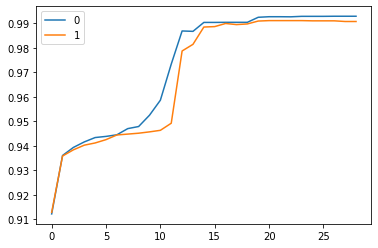

In [15]:
# C값에 따른 train, test 정확도 비교
pd.DataFrame(scores).plot()

## prediction (예측값) 확인

In [21]:
pred_y = model.predict(X_user_test_sc)
pred_y

array([ 1,  1,  5, ...,  1,  1, 11])

In [22]:
print(pred_y.shape)
y_user_test_array = y_user_test.to_numpy().T
print(y_user_test.shape)
print(y_user_test_array)

(11062,)
(11062, 1)
[[ 1  1  5 ...  1  1 11]]


## f1 (재현율) 확인

In [23]:
import numpy as np
import sklearn.metrics as metrics

accuracy = np.mean(np.equal(y_user_test_array, pred_y))
right = np.sum(y_user_test_array * pred_y == 1)
precision = right / np.sum(pred_y)
recall = right/np.sum(y_user_test_array)
f1 = 2 * precision * recall / (precision + recall)

print('accuracy :', accuracy)
print('precision :', precision)
print('recall :', recall)
print('f1 :', f1)

#sklearn을 이용하면 전부 계산해줌
print('accuracy :', metrics.accuracy_score(y_user_test_array, pred_y))
print('precision :', metrics.precision_score(y_user_test_array, pred_y))
print('recall : ', metrics.recall_score(y_user_test_array, pred_y))
print('f1 : ', metrics.f1_score(y_user_test_array, pred_y))

print(metrics.classification_report(y_user_test_array, pred_y))
print(metics.confusion_matrix(y_user_test_array, pred_y))


accuracy : 0.9906888446935455
precision : 0.1043777707409753
recall : 0.10463455281326879
f1 : 0.10450600404232553


ValueError: Found input variables with inconsistent numbers of samples: [1, 11062]

In [25]:
roc_auc = metrics.roc_auc_score(y_user_test_array, model.decision_function(X_user_test_sc))

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Spectificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'Model (Auc = %0.2f)'% roc_auc)
plt.plot([0,1], [1,1], 'y--')
plt.plot([0,1], [0,1], 'r--')

plt.legend(loc = 'lower right')
plt.show()

ValueError: multiclass-multioutput format is not supported

## SVM 모델 Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

modle = SVC(kernel = 'linear', C = 10).fit(X_user_train_std, y_user_train)
scores = cross_val_score(model, X_user_train_std, y_user_train, cv = 5)
print("CV 점수 : " + str(scores))
st_scores = cross_val_score(model, X_user_train_std, y_user_train, cv = StratifiedKFold(5, random_state = 10, shuffle = True))
print()
print("CV 평균점수 : " + str(scores.mean()))
print("StratifiedKFold CV 평균점수 : " + str(st_scores.mean()))

In [16]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

modle = SVC(kernel = 'rbf', C = 10).fit(X_user_train_std, y_user_train)
scores = cross_val_score(model, X_user_train_sc, y_user_train, cv = 5)
print("CV 점수 : " + str(scores))
st_scores = cross_val_score(model, X_user_train_std, y_user_train, cv = StratifiedKFold(5, random_state = 10, shuffle = True))
print()
print("CV 평균점수 : " + str(scores.mean()))
print("StratifiedKFold CV 평균점수 : " + str(st_scores.mean()))

/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

CV 점수 : [0.99670734 0.99302596 0.99476947 0.99244479 0.99457575]


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.


CV 평균점수 : 0.9943046606997019
StratifiedKFold CV 평균점수 : 0.9943046682039964


## GridSearchCV

In [17]:
# GridSearchCV를 사용하면 최적의 parameter와 그때의 score값을 한 번에 찾을 수 있음.
from sklearn.model_selection import GridSearchCV

param = {'C': [1, 5, 10, 20, 30],
        'gamma': [.1, .25, .5, 1]}

GS = GridSearchCV(SVC(kernel = 'rbf'), param, cv = 5)
GS.fit(X_user_train_sc, y_user_train)
print(GS.best_params_)
print(GS.best_score_)

/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

{'C': 30, 'gamma': 0.25}
0.9957769282416095


## Predicion (예측하기)

In [19]:
X_user_test = test.drop(['id'], axis = 1)
test.head()
testmat = np.array(test)
test = scaler.fit_transform(test)

model = SVC(kernel = 'rbf', C = 10, gamma= .1).fit(X_user_train_std, y_user_train)

NameError: name 'test' is not defined

In [ ]:
prediction = model.predict(test)
pred = pd.DataFrame(prediction)
pred